# Лабораторная работа №5. Композиция алгоритмов.
## Импорт необходимых библиотек.

In [2]:
import numpy as np
import pandas as pd

from adaboost import AdaBoostClassifier
from random_forest import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn import preprocessing

## Считывание данных

In [3]:
df_chips = pd.read_csv('./dataset/chips.csv')
df_geyser = pd.read_csv('./dataset/geyser.csv')

### Краткая информация о датасетах

In [4]:
df_chips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       118 non-null    float64
 1   y       118 non-null    float64
 2   class   118 non-null    object 
dtypes: float64(2), object(1)
memory usage: 2.9+ KB


In [5]:
df_geyser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       222 non-null    int64  
 1   y       222 non-null    float64
 2   class   222 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.3+ KB


### Minimax нормализация

In [6]:
def minmax_normalization(df):
    scaler = preprocessing.MinMaxScaler()
    names_df = df.columns.drop('class')
    df[names_df] = scaler.fit_transform(df[names_df])

### Дискретизация

In [7]:
def target_discretization(df):
    mapping = {'P': 1, 'N': 0}
    df['class'].replace(to_replace=mapping, inplace=True)

### Предварительная обработка данных (нормализация и дискретизация)

In [8]:
def preprocessing_initial_data(df):
    minmax_normalization(df)
    target_discretization(df)

In [9]:
preprocessing_initial_data(df_chips)
preprocessing_initial_data(df_geyser)

### Визуализация данных

In [10]:
def visualization_initial_data(df, title):
    colors = {1: 'red', 0: 'blue'}
    plt.title(title)
    plt.xlabel('x-label')
    plt.ylabel('y-label')
    plt.scatter(df.x, df.y, c=df['class'].map(colors))

In [11]:
def plot_model(X, y, clf=None, sample_weights = None, ax=None):

    pad = 0.5
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

    if sample_weights is not None:
        sizes = np.array(sample_weights) * X.shape[0] * 100
    else:
        sizes = np.ones(shape=X.shape[0]) * 100

    X_pos = X[y == 1]
    sizes_pos = sizes[y == 1]
    ax.scatter(*X_pos.T, s=sizes_pos, marker='+', color='red')

    X_neg = X[y == 0]
    sizes_neg = sizes[y == 0]
    ax.scatter(*X_neg.T, s=sizes_neg, marker='.', c='blue')

    if clf:
        plot_step = 0.01
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))

        Z = np.array(clf.predict(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)

        ax.contourf(xx, yy, Z, alpha=0.2)

    ax.set_xlim(x_min+0.5, x_max-0.5)
    ax.set_ylim(y_min+0.5, y_max-0.5)
    return ax

### Данные в датасете Chips

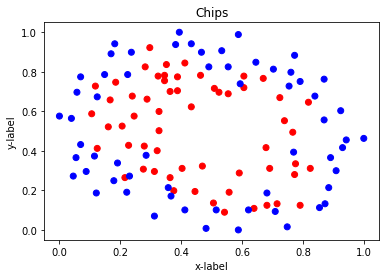

In [12]:
visualization_initial_data(df_chips, 'Chips')

### Данные в датасете Geyser

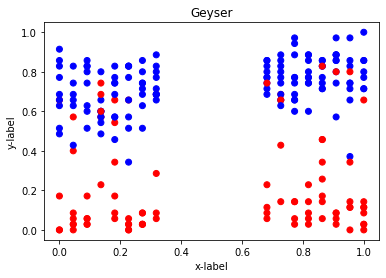

In [13]:
visualization_initial_data(df_geyser, 'Geyser')

In [14]:
X_Geyser = df_geyser.values[:, :-1]
Y_Geyser = df_geyser.values[:, -1]

X_Chips = df_chips.values[:, :-1]
Y_Chips = df_chips.values[:, -1]

### Реализация AdaBoost и построение случайного леса

In [15]:
ada_boost_classifier_Geyser = AdaBoostClassifier()
ada_boost_classifier_Geyser.fit(X_Geyser, Y_Geyser)

ada_boost_classifier_Chips = AdaBoostClassifier()
ada_boost_classifier_Chips.fit(X_Chips, Y_Chips)

random_forest_classifier_Geyser = RandomForestClassifier(n_estimators=10)
random_forest_classifier_Geyser.fit(X_Geyser, Y_Geyser)

random_forest_classifier_Chips = RandomForestClassifier(n_estimators=10)
random_forest_classifier_Chips.fit(X_Chips, Y_Chips)

### Датасет Geyser

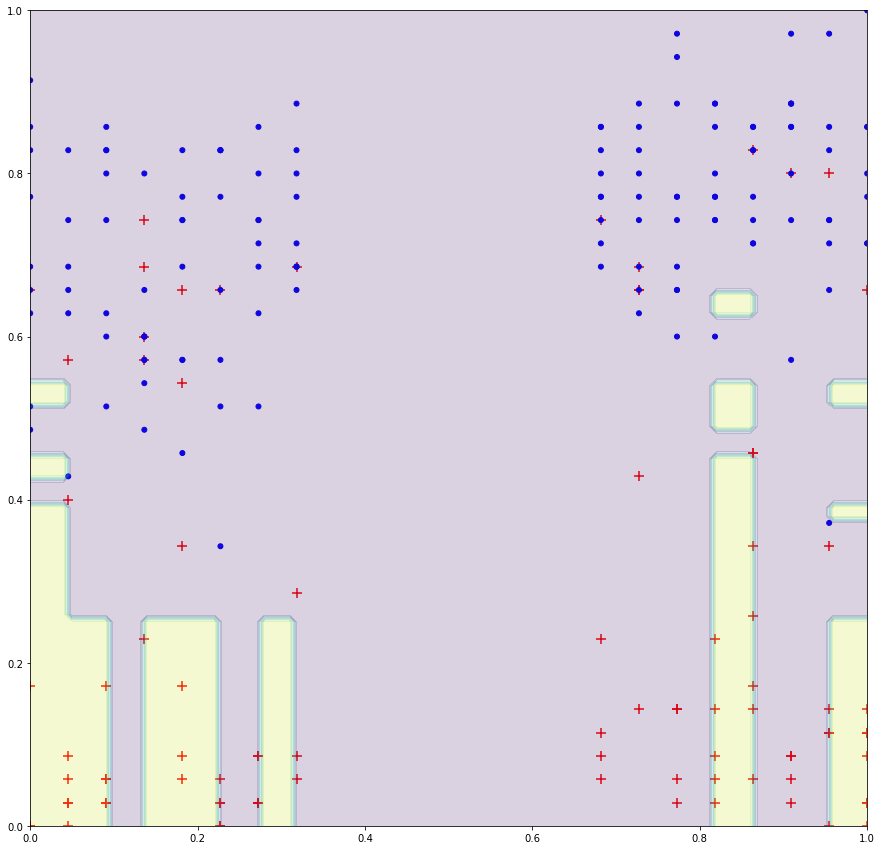

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = plot_model(X_Geyser, Y_Geyser, random_forest_classifier_Geyser, ax=ax)

### Датасет Chips

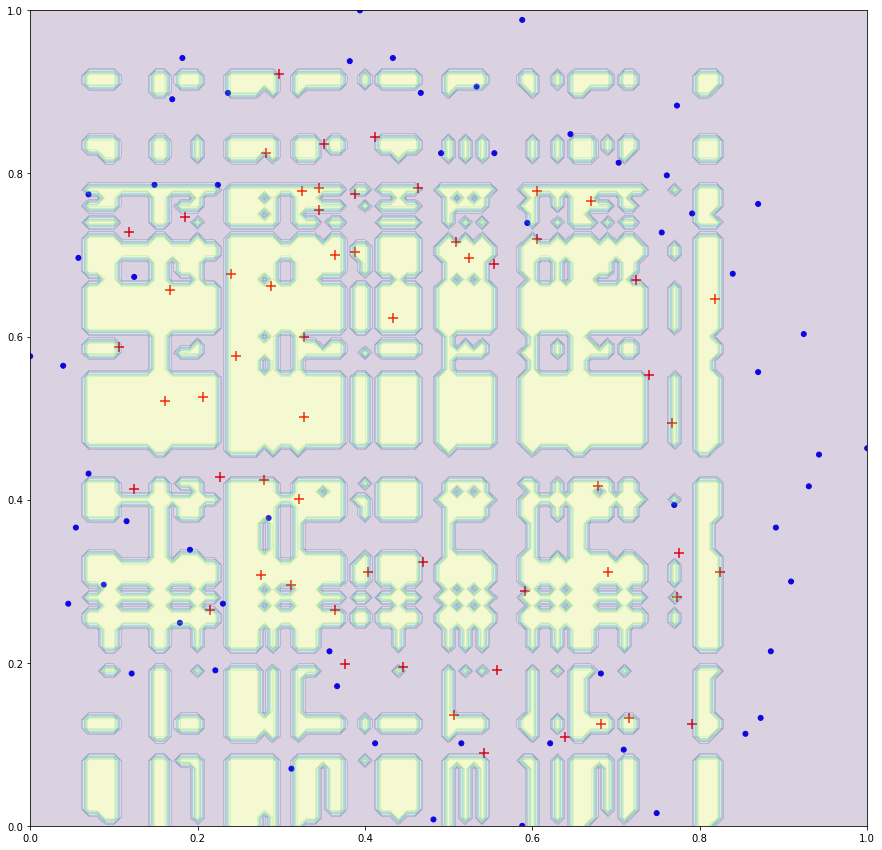

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
ax = plot_model(X_Chips, Y_Chips, random_forest_classifier_Chips, ax=ax)

### Шаги бустинга

In [18]:
steps_set = [1, 2, 3, 5, 8, 13, 21, 34, 55]

### Визуализация шагов бустинга для датасета Geyser

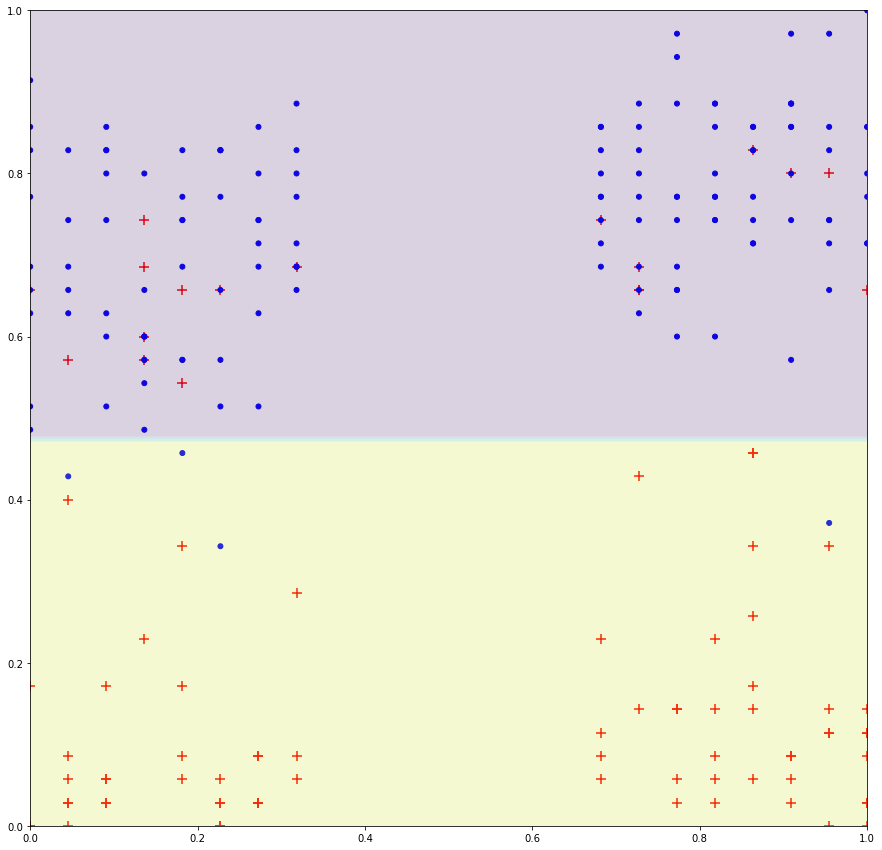

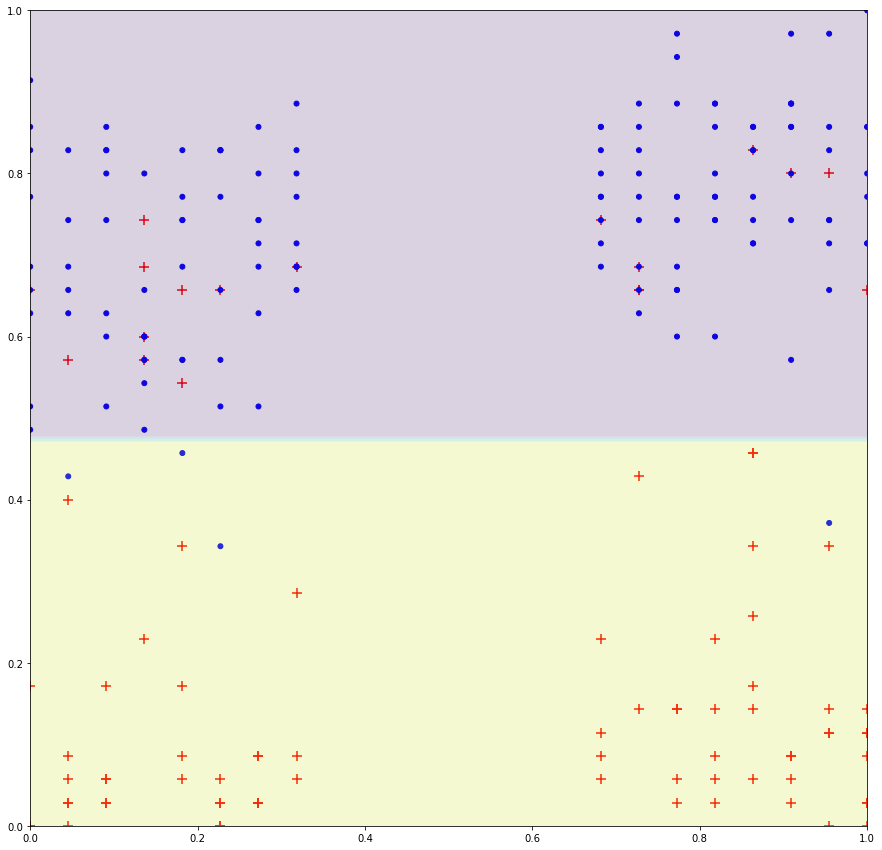

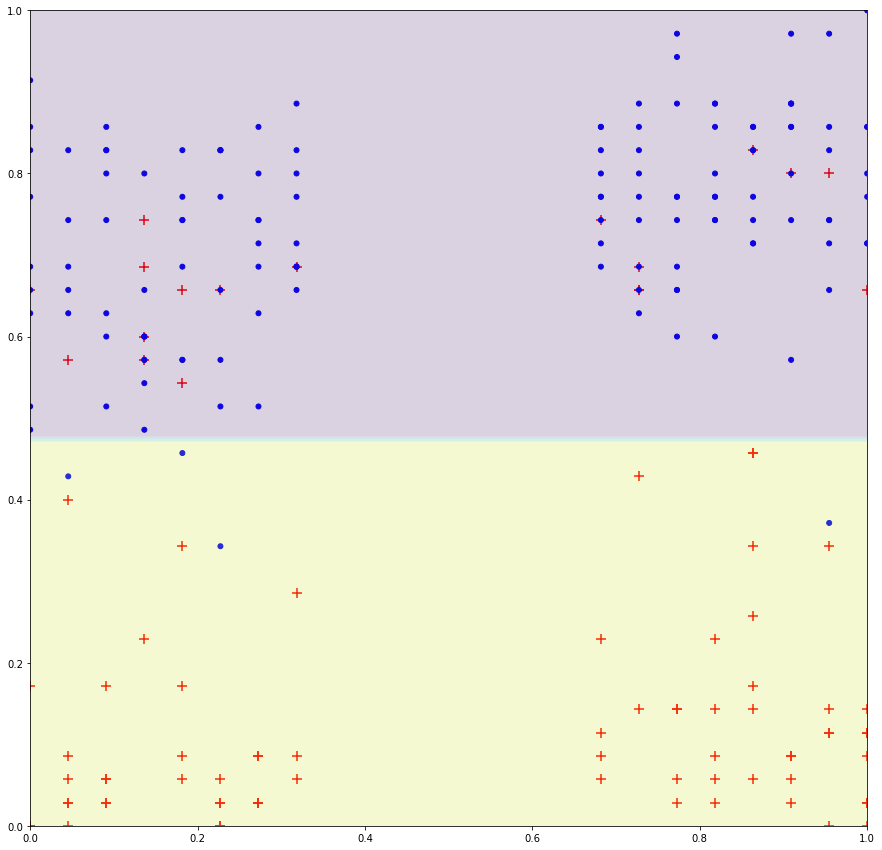

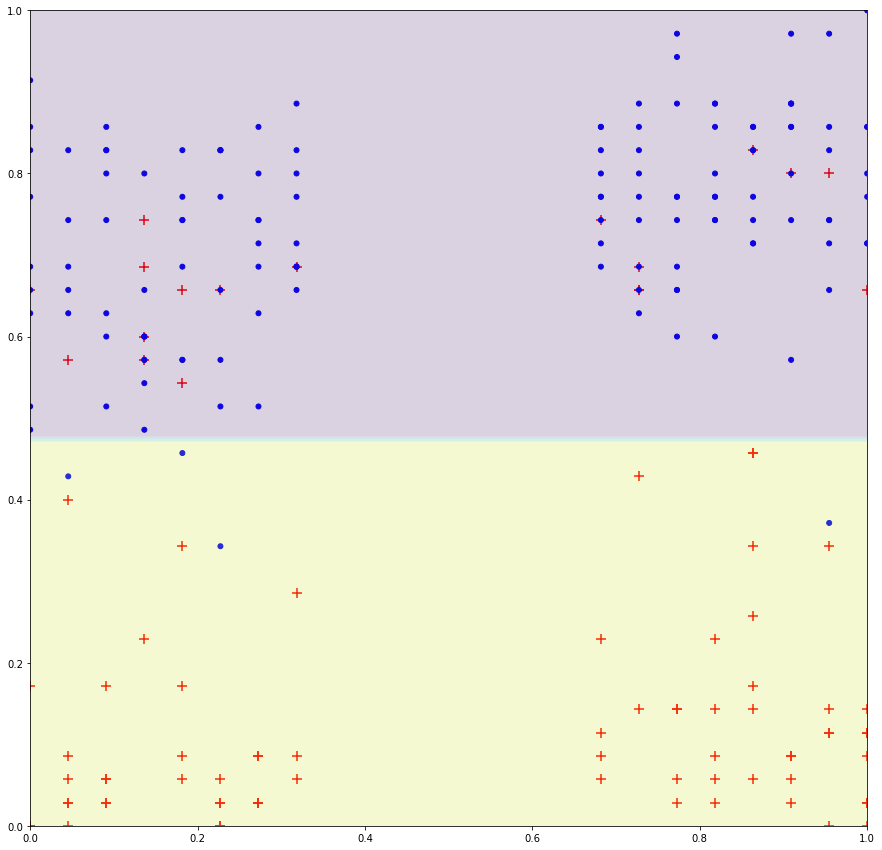

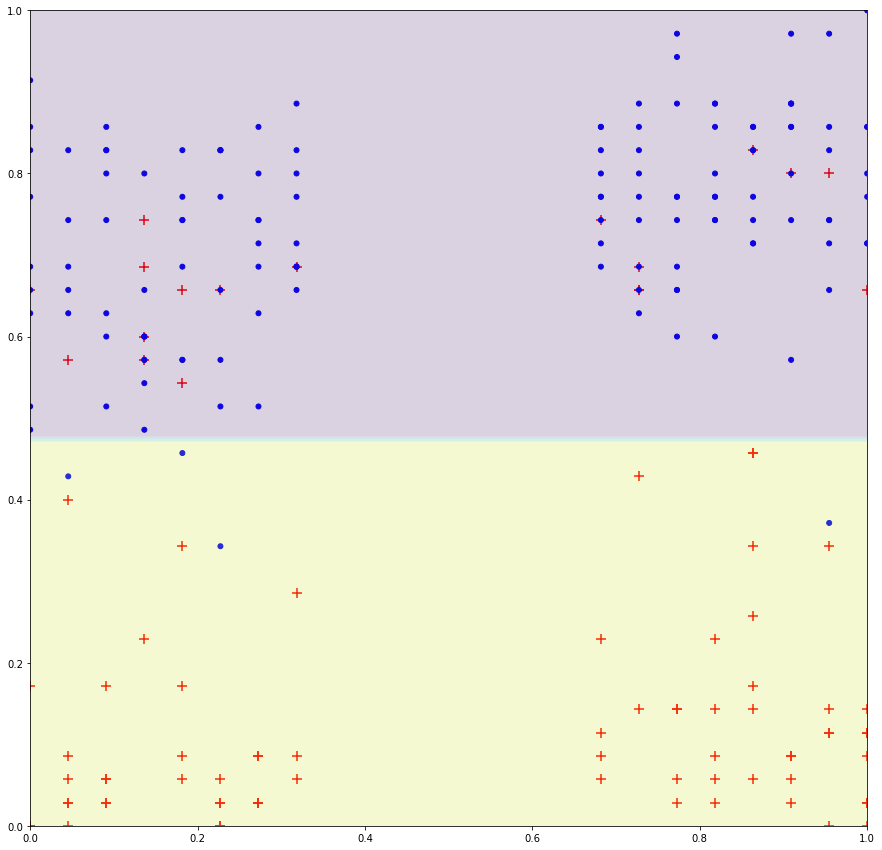

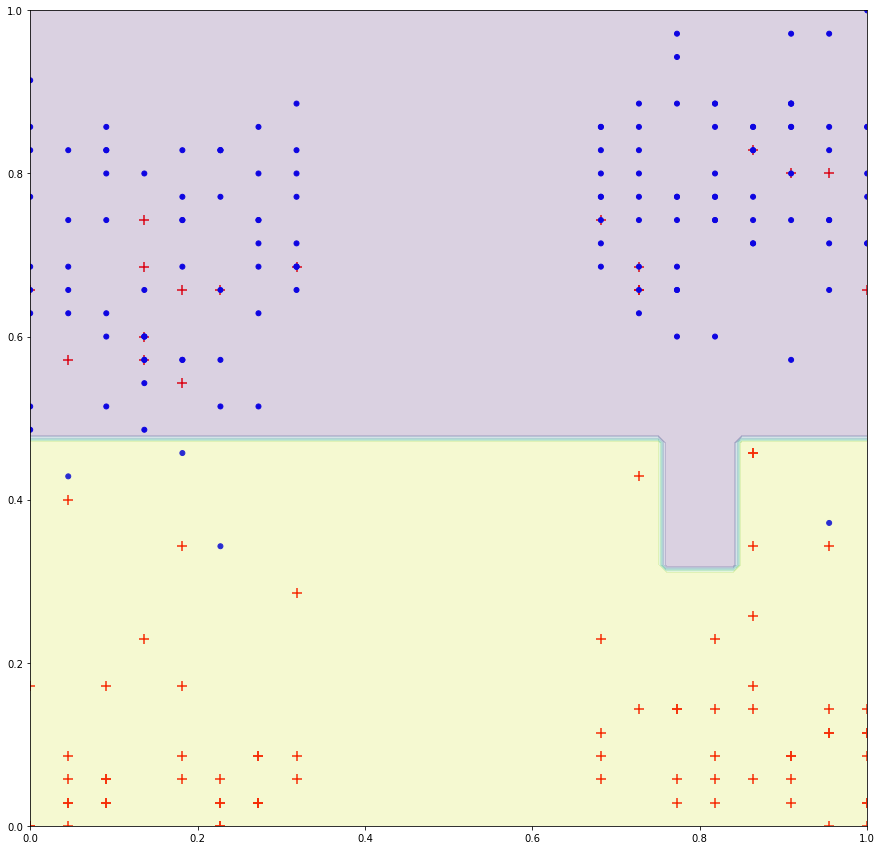

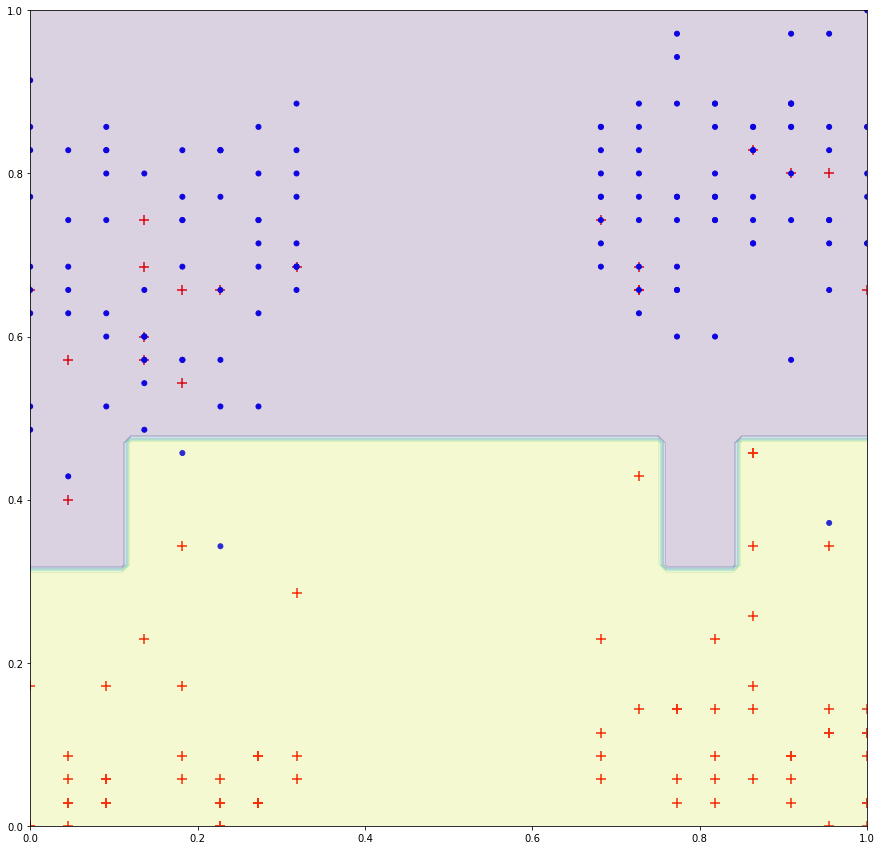

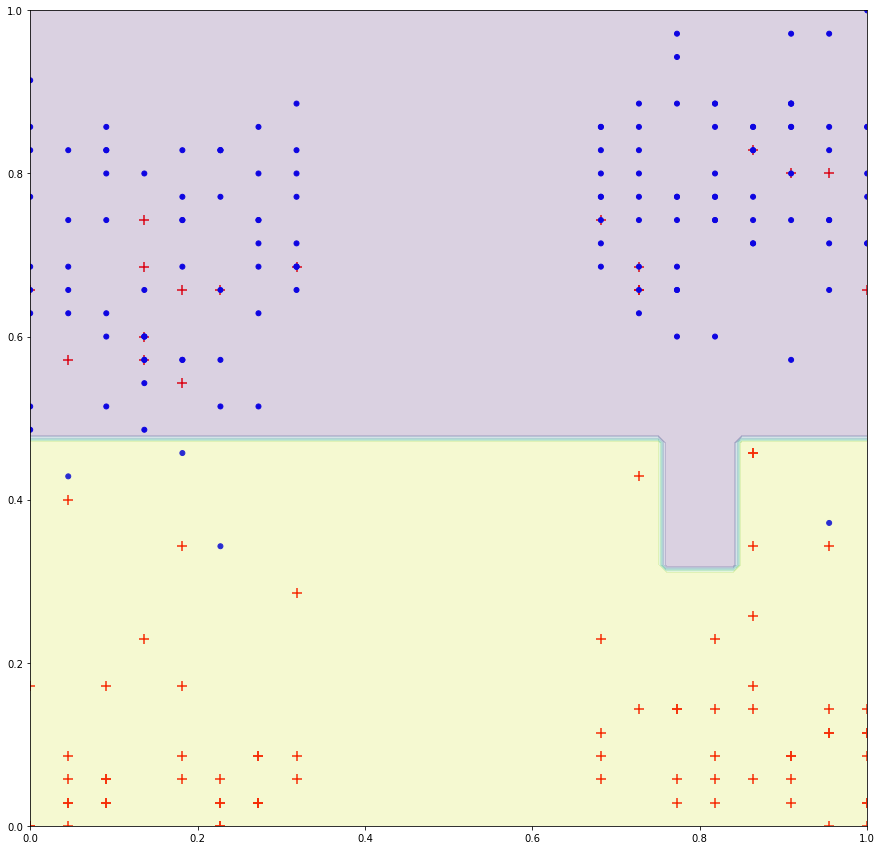

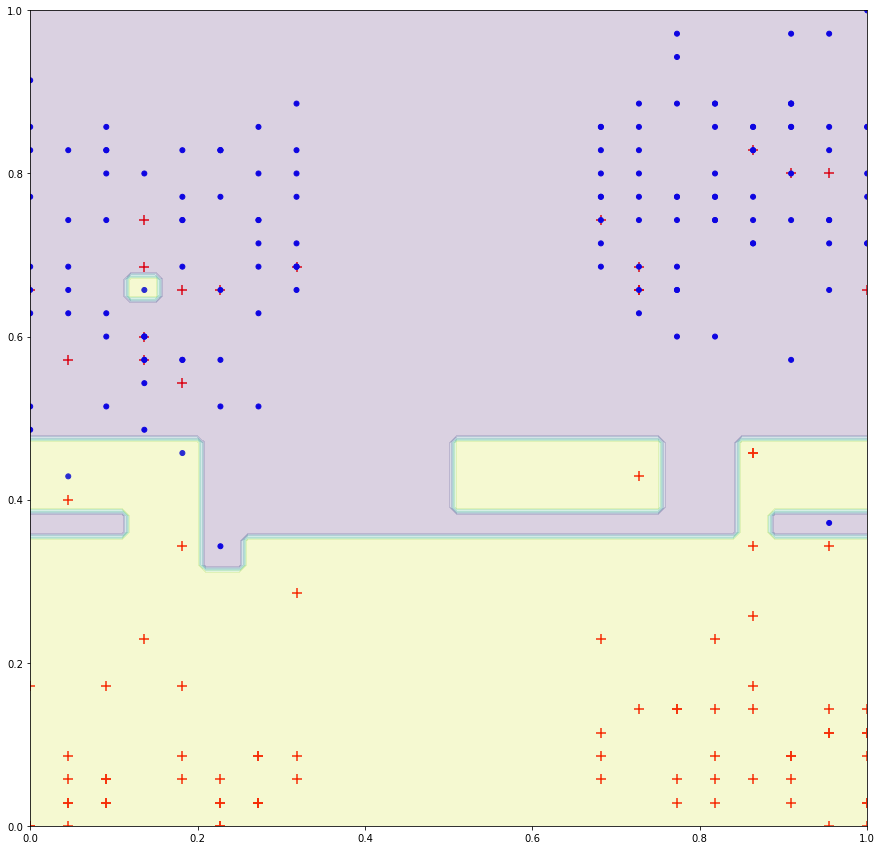

In [19]:
for step in steps_set:
    ada_boost_classifier_Geyser.M = step
    fig, ax = plt.subplots(figsize=(15, 15))
    ax = plot_model(X_Geyser, Y_Geyser, ada_boost_classifier_Geyser, ax=ax)

### График зависимости точности от номера шага для датасета Geyser

Text(0, 0.5, 'Accuracy')

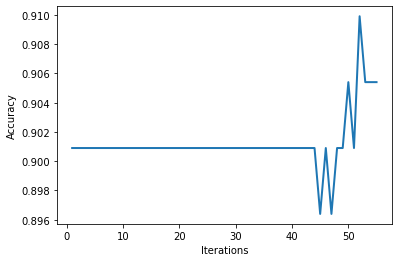

In [23]:
from sklearn.metrics import accuracy_score
accuracy = []
iterations = np.arange(1, 56)
for i in iterations:
   ada_boost_classifier_Geyser.M = i
   predictions = ada_boost_classifier_Geyser.predict(X_Geyser)
   accuracy.append(accuracy_score(Y_Geyser, predictions))

fig, ax = plt.subplots()
ax.plot(iterations, accuracy, linewidth=2.0)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

### График зависимости точности от номера шага для датасета Chips

Text(0, 0.5, 'Accuracy')

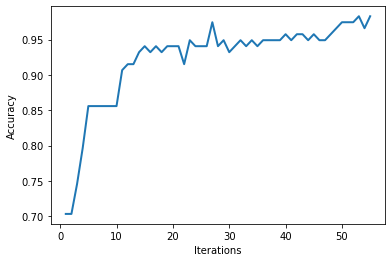

In [24]:
accuracy = []
iterations = np.arange(1, 56)
for i in iterations:
   ada_boost_classifier_Chips.M = i
   predictions = ada_boost_classifier_Chips.predict(X_Chips)
   accuracy.append(accuracy_score(Y_Chips, predictions))

fig, ax = plt.subplots()
ax.plot(iterations, accuracy, linewidth=2.0)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')